# Homework 2: U.S. Boundary Currents

Name: Misha Buka   

Date: 10/03/24

#### Overview
In class, we examined the general structure of ocean circulation on large scales and found that major ocean basins contain gyres - large circulation cells in the ocean. Further, we saw that vertical motion is driven by changes in density. In this homework, you will examine the structure of the ocean currents along the east and west coasts of the U.S and consider how these currents fit into the broader ocean circulation.

#### Import Modules
To begin, import the modules required to access data from netCDF files and make plots:

In [1]:
# import modules here
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

### Part 1: Horizonal Velocity Structure
First, examine the mean velocity on the west and east coasts of the U.S. Begin by loading in both the `EVEL` and `NVEL` fields from the `EVEL_2015_12.nc` and `VVEL_2015_12.nc` files, respectively -- these fields represent the zonal (eastward-flowing) and meridional (westward-flowing) velocity in the model. 

In [2]:
# read in the EVEL and VVEL files to an xarray dataset
# note that these files must be in the same folder as this notebook
ds_east = xr.open_dataset('EVEL_2015_12.nc')
ds_north = xr.open_dataset('NVEL_2015_12.nc')

In [3]:
# store the velocity components and longitude/latitude data
# into numpy arrays
evel = np.array(ds_east['EVEL'])
nvel = np.array(ds_north['NVEL'])
lon = np.array(ds_east['longitude'])
lat = np.array(ds_east['latitude'])

Now that you have the data read in, make a plot of the eastward and northward velocity at the surface of the ocean. Be sure to add a title to each plot and some labels for the x and y axes.

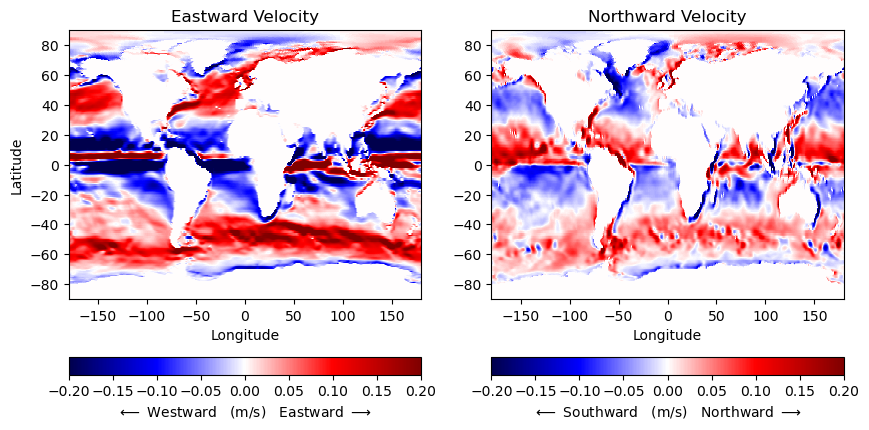

In [6]:
# make a plot of the velocity components (one for each)
# use a divergent colormap (such as seismic) to visualize the data
# for interpretation, it will likely be helpful to adjust the data
# bounds to be +/- 0.5 or even +/- 0.1

# make a figure
fig = plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
C = plt.pcolormesh(lon,lat,evel[0, 0, :, :], vmin = -.2, vmax=.2, cmap='seismic')
plt.colorbar(C, orientation='horizontal',
             label='$\longleftarrow$ Westward   (m/s)   Eastward $\longrightarrow$' )
plt.title('Eastward Velocity')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

plt.subplot(1,2,2)
C = plt.pcolormesh(lon,lat,nvel[0, 0, :, :], vmin = -.2, vmax=.2, cmap='seismic')
plt.colorbar(C, orientation='horizontal',
             label='$\longleftarrow$ Southward   (m/s)   Northward $\longrightarrow$' )
plt.xlabel('Longitude')
plt.title('Northward Velocity');


### Questions:
1. What direction are the surface currents moving (roughly) at:
    - 30$^{\circ}$N on the east cost of the U.S.? the west coast?
    - 45$^{\circ}$N on the east cost of the U.S.? the west coast?
2. Which current flows faster? East coast or west coast?
2. Explain how these currents are part of the gyres in the North Atlantic and North Pacific.

1. At 30 degrees North on the east coast the flow is in the Northeast direction. On the West coast at the same lattitude, the flow is in the South direction. At 45 degrees North on the east coast the flow is roughly in the Sourth direction. On the West coast at the same lattitude, the flow is roughly in teh North East Direction.
2. At 30 degrees North, the East coast has faster flow. At 45 degrees North the West coast has more flow.

### Part 2: Horizonal Temperature Structure
Next, examine the mean temperature on the coasts of the U.S. Load in the temperature field `THETA` from the `THETA_2015_12.nc` file. 

In [7]:
# read in the THETA file to an xarray dataset
# note that this file must be in the same folder as this notebook
ds_theta = xr.open_dataset('THETA_2015_12.nc')

In [8]:
# store the THETA grid into a into numpy array
theta = np.array(ds_theta['THETA'])

Similar to your plot above, make a plot of the temperature at the surface of the ocean. 

Text(0, 0.5, 'Latitude')

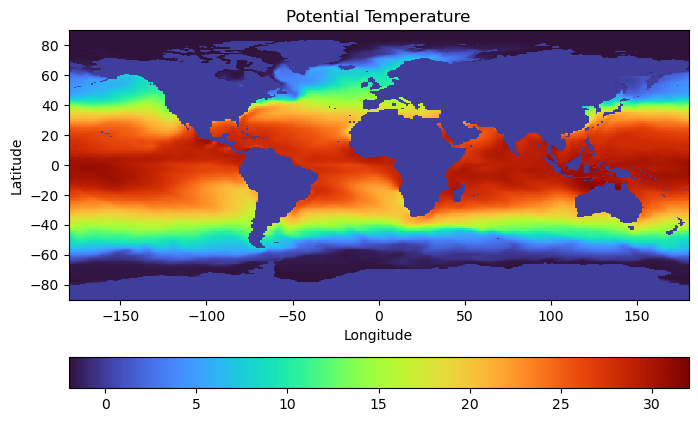

In [10]:
# make a plot of the temperature
# set the data bounds to -2 to 32 with a 
# sensible color map to visualize the data

# make a figure
fig = plt.figure(figsize=(8,5))

# plot the data
plt.plot()
plt.pcolormesh(lon, lat, theta[0,0,:,:], vmin= -2, vmax= 32, cmap='turbo')
plt.colorbar(orientation='horizontal')
plt.title('Potential Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')


### Questions:
1. How does the temperature on the west cost of the U.S. compare to the east coast at the same latitude?
2. How might ocean currents contribute to this temperature regime?

1. The temperature is roughly the same on both coasts at around 45 degrees North. However, going down both coasts, the East caost heats while the west coast stays roughly the same.
2. Vaporized water likes to percipitate around 30 degrees which would make the water around that lattitude warmer. Since on the east coast that waster would move towards and and up the caost, which is why there is warmer water along the coast, that cools off as it moves upwards. On the other hand, the flow on teh west coast at 30 degrees North is away from the coast, which is why the west Coast does not enjoy the same warm water as the east coast does.

### Part 3: Vertical Structure
Next, look at the vertical structure of ocean currents as well as temperature on the U.S coast. Being by loading in the vertical velocity field `WVELSTAR` from the `WVELSTAR_2015_12.nc` file. This variable estimates the speed at which water is moving in the vertical direction.

In [11]:
# read in the WVELSTAR file to an xarray dataset
# note that this file must be in the same folder as this notebook
ds_wvelstar = xr.open_dataset('WVELSTAR_2015_12.nc')


In [15]:
# store the WVELSTAR grid into a into numpy array
wvelstar = np.array(ds_wvelstar['WVELSTAR'])

In [64]:
ds_theta

<xarray.Dataset>
Dimensions:    (i: 720, k: 50, j: 360, time: 1, nv: 2)
Coordinates:
  * i          (i) int64 0 1 2 3 4 5 6 7 8 ... 712 713 714 715 716 717 718 719
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * j          (j) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * time       (time) datetime64[ns] 2015-12-16T12:00:00
    latitude   (j) float64 ...
    longitude  (i) float64 ...
    Z          (k) float32 ...
    timestep   (time) int64 ...
    time_bnds  (time, nv) datetime64[ns] ...
Dimensions without coordinates: nv
Data variables:
    THETA      (time, k, j, i) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes: (12/20)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 4
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  CF-1.6
    ...                           ...
    nz:                           50
    geospatial_vertical_units:    meter
    geospatial_vertical_max:      -5.0
    date_created:                 Thu Aug 22 19:28:22 2019
    time_coverage_start:          2015-12-01T00:00:00
    time_coverage_end:            2016-01-01T00:00:00

Since we'll be plotting a vertical profile, we'll also need a depth variable. Read this variable into a numpy array in the same way you read in the data above.

In [65]:
# read in the depth variable to a numpy array
# Hint: Look at the metadata for the WVELSTAR
# What is the name of the depth variable?

depth = np.array(ds_wvelstar['Zl'])
depth_theta = np.array(ds_theta['Z'])

In [67]:
print(theta.shape)
print(wvelstar.shape)
print(depth.shape)
print(lon.shape)

(1, 50, 360, 720)
(1, 50, 360, 720)
(50,)
(720,)


Next, create side-by-side plots of vertical velocity and temperature along the row corresponding to the latitude 40$^{\circ}$N i.e. index 259 along the latitude axis.

Text(0, 0.5, 'Depth (m)')

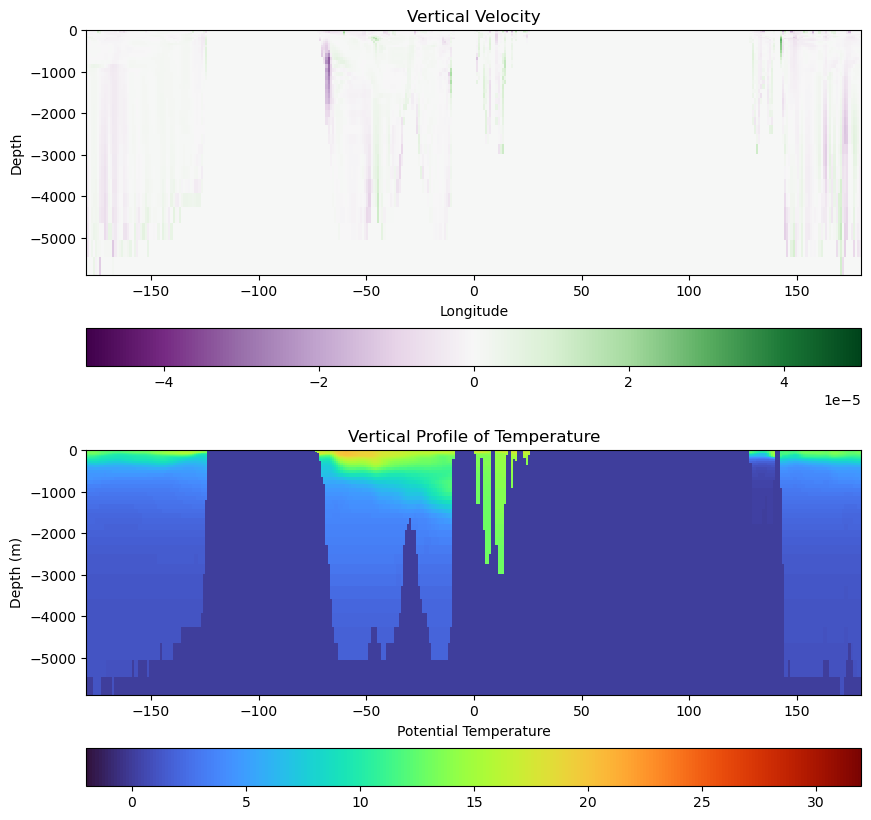

In [73]:
# make a figure
fig = plt.figure(figsize=(10,10))

# make subplot the vertical velocity
# use a divergent colorbar
# you will need to adjust the color bounds appropriately for this data
# try a few values and see what works
plt.subplot(2,1,1)
plt.pcolormesh(lon, depth, wvelstar[0,:,259,:], vmin=-.00005, vmax=.00005, cmap='PRGn')
plt.colorbar(orientation='horizontal')
plt.title('Vertical Velocity')
plt.xlabel('Longitude')
plt.ylabel('Depth')


# make a subplot of the vertical profile of temperature
plt.subplot(2,1,2)
plt.pcolormesh(lon, depth, theta[0,:,259,:], vmin=-2, vmax=32, cmap='turbo')
plt.colorbar(orientation='horizontal')
plt.title('Vertical Profile of Temperature')
plt.xlabel('Potential Temperature')
plt.ylabel('Depth (m)')




### Questions:
1. How does the vertical velocity in the current on the west coast compare to that on the east?
2. How does the speed of vertical velocity compare to horizontal velocity? Why are they different? In other words, what are the forcing mechanisms associated with each?
3. How might the vertical currents adjacent to the coastline contribute to the differences in surface temperature?
4. Challenge question: On the west coast of the U.S., the prevailing winds tend to flow south in the spring time. How might these winds contribute to the vertical velocity identified in question 1?

1. On the West coast the water is moving upwards, while its the opposite on the east coast.
2. Downwards velocity is generally larger in magnitude then upwards velocity. Warm water likes to move upwards, and since it is rare to have warm water at depth at this lattitude, there would be less water traveling upwards. Also if water is being moved away from the coast, it would cause an upwelling near the coast, while the opposite would happen if water was being pushed towards the coast. For this reason, there is a lot of downwelling along the east coast, while not as much vertical movement(slight upweling) along the west coast.
3. Since the upwelling along the west coast is cold water coming up, it would cause the water along the west caost to be much colder. 
4. Since the winds are traveling south, the surface water will flow south west, causing an upwelling.